Digite a expressao da funcao f(x): atan(x)
Digite o valor do centro a da serie: 0
Digite o valor de Kmin: 2
Digite o valor de Kmax (Kmax - Kmin >= 3): 5
Digite o valor de xmin: -2
Digite o valor de xmax: 2
Digite o valor de delta: 0.1


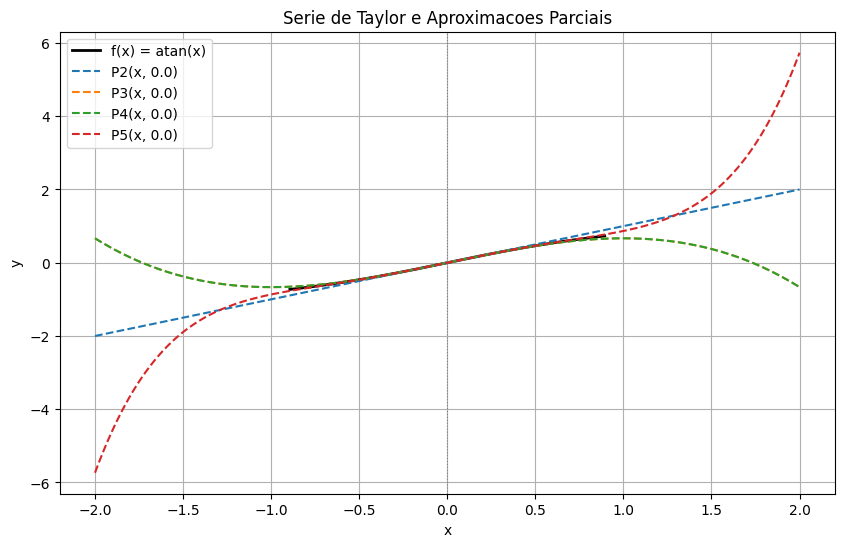

In [4]:
#Série de Taylor- Métodos Matemáticos
#Autor: Eduardo Gomes Meneses Filho
#UFPB

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Entrada dos dados
expr_str = str(input("Digite a expressao da funcao f(x): "))

a = float(input("Digite o valor do centro a da serie: "))
Kmin = int(input("Digite o valor de Kmin: "))
Kmax = int(input("Digite o valor de Kmax (Kmax - Kmin >= 3): "))
xmin = float(input("Digite o valor de xmin: "))
xmax = float(input("Digite o valor de xmax: "))
delta = float(input("Digite o valor de delta: "))

# Definindo a funcao simbolicamente
x = sp.symbols('x')
f = sp.sympify(expr_str)

# Raio de convergencia (se possivel determinar pela razao ou raiz)
# Defina o raio de convergência manualmente se souber (por exemplo, R = 1 para arctan(x) em torno de 0)
R = 1  # Para arctan(x), o raio de convergência é 1


# Geração dos polinômios de Taylor
polynomials = []
for k in range(Kmin, Kmax + 1):
    taylor_poly = f.series(x, a, k + 1).removeO()
    polynomials.append((k, taylor_poly))

# Plotagem
x_vals = np.linspace(xmin, xmax, 500)
f_vals = [float(f.subs(x, val)) for val in x_vals if a - R + delta <= val <= a + R - delta]
x_vals_f = [val for val in x_vals if a - R + delta <= val <= a + R - delta]

plt.figure(figsize=(10, 6))
plt.plot(x_vals_f, f_vals, label=f"f(x) = {expr_str}", linewidth=2, color='black')

for k, poly in polynomials:
    poly_vals = [float(poly.subs(x, val)) for val in x_vals]
    plt.plot(x_vals, poly_vals, linestyle='--', label=f"P{k}(x, {a})")

plt.axvline(a, color='gray', linestyle=':', linewidth=0.8)
plt.title("Serie de Taylor e Aproximacoes Parciais")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
